In [1]:
#Importing modules

import numpy as np
import pandas as pd

In [2]:
#Dataset reading

books= pd.read_csv("user-interactions.csv")

In [3]:
books.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [4]:
books.shape

(10000000, 5)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   user_id       int64  
 2   pratilipi_id  int64  
 3   read_percent  float64
 4   updated_at    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 381.5+ MB


In [6]:
#Separating date and time from updated_at column

books['Reading_time'] = pd.to_datetime(books['updated_at']).dt.time
books['Reading_date'] = pd.to_datetime(books['updated_at']).dt.date

books.drop(['Unnamed: 0','updated_at'], axis=1, inplace=True)

In [7]:
books.head()

,user_id,pratilipi_id,read_percent,Reading_time,Reading_date
0,5506791963854965,1377786220672965,100.0,00:08:26.227000,2022-03-23
1,5506791979071996,1377786219742624,29.0,00:08:26.220000,2022-03-23
2,5506791980256358,1377786217096334,22.0,00:08:26.020000,2022-03-23
3,5506791988747277,1377786224767880,100.0,00:08:25.306000,2022-03-23
4,5506791992372558,1377786218111595,100.0,00:08:25.250000,2022-03-23


In [8]:
#Checking for null values
books.isnull().sum()

user_id         0
pratilipi_id    0
read_percent    0
Reading_time    0
Reading_date    0
dtype: int64

In [9]:
books['pratilipi_id'].value_counts()

1377786228205426    13630
1377786217541698     9850
1377786228336060     9390
1377786228240538     8519
1377786228237359     8364
                    ...  
1377786221734767        1
1377786225162233        1
1377786226855030        1
1377786226386276        1
1377786223645432        1
Name: pratilipi_id, Length: 373138, dtype: int64

In [10]:
books.user_id.value_counts()

5506791984436689    1793
5506791978555287    1786
5506791954021043    1514
5506791985959683    1459
5371339105280676    1409
                    ... 
5506791993722736       1
5506791953500920       1
5506791959188177       1
5506791996594687       1
5506791973515905       1
Name: user_id, Length: 355988, dtype: int64

In [11]:
books.duplicated().sum()

0

<AxesSubplot:xlabel='read_percent', ylabel='Count'>

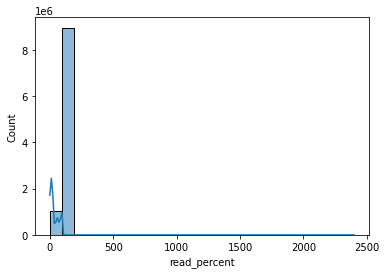

In [12]:
import seaborn as sns
sns.histplot(data=books, x="read_percent", kde=True)

# Collaborative Filtering based recommender

In [13]:
#Grouping dataset on user_id column and considering those users who have read more than 200 pratilipis.
x = books.groupby('user_id').count()['pratilipi_id'] > 200
padhe_users = x[x].index

In [14]:
filtered_reading = books[books['user_id'].isin(padhe_users)]

In [15]:
#Grouping dataset on pratilipi_id and considering those pratilipis which has a reading count of more than or equal to 50.
y = filtered_reading.groupby('pratilipi_id').count()['read_percent'] >=50
famous_books = y[y].index

In [16]:
famous_books

Int64Index([1377786215504942, 1377786215949541, 1377786215998026,
            1377786216307009, 1377786216393559, 1377786216396407,
            1377786216424173, 1377786216449958, 1377786216463402,
            1377786216465378,
            ...
            1377786228362909, 1377786228363200, 1377786228363262,
            1377786228363664, 1377786228364236, 1377786228364502,
            1377786228364799, 1377786228366028, 1377786228368115,
            1377786228368411],
           dtype='int64', name='pratilipi_id', length=14718)

In [17]:
final_reading = filtered_reading[filtered_reading['pratilipi_id'].isin(famous_books)]

In [18]:
final_reading = final_reading.drop_duplicates()

In [19]:
#Making pivot table to make user_id as columns and pratilipi_id as rows and read_percent as values
pt = final_reading.pivot_table(index='pratilipi_id', columns='user_id', values ='read_percent')

In [20]:
pt.fillna(0, inplace= True)

In [21]:
pt

user_id,3263998672675492,3267248272614052,3292327750574756,3325209882305188,3369300870996644,3400649439355556,3415641217213092,3453383519150756,3482862759617188,3509698717721252,...,5506791996445153,5506791996456815,5506791996459059,5506791996481898,5506791996482552,5506791996506941,5506791996518793,5506791996532386,5506791996549504,5506791996588116
pratilipi_id,,,,,,,,,,,,,,,,,,,,,
1377786215504942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786215949541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786215998026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786216307009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786216393559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377786228364502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786228364799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786228366028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Importing cosine similarity to find similarity of rows with other rows.
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
cosine_similarity(pt)

array([[1.        , 0.01380764, 0.01324665, ..., 0.        , 0.        ,
        0.        ],
       [0.01380764, 1.        , 0.01578138, ..., 0.        , 0.01655295,
        0.        ],
       [0.01324665, 0.01578138, 1.        , ..., 0.02863288, 0.        ,
        0.00917481],
       ...,
       [0.        , 0.        , 0.02863288, ..., 1.        , 0.        ,
        0.03679054],
       [0.        , 0.01655295, 0.        , ..., 0.        , 1.        ,
        0.04700065],
       [0.        , 0.        , 0.00917481, ..., 0.03679054, 0.04700065,
        1.        ]])

In [24]:
similarity_score = cosine_similarity(pt)

In [25]:
#Function to take pratilipi_id as input and returns similar books based on reading_time by the user.

def recommend(Pratilipi_id):
    index = np.where(pt.index==Pratilipi_id)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['pratilipi_id'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('pratilipi_id')['pratilipi_id'].values))
        
        data.append(item)
    
    return data

In [26]:
recommend(1377786228364502) # Gives list of 5 books Similar to the book which the user had read.

[[1377786228354263],
 [1377786228333808],
 [1377786228333274],
 [1377786228318432],
 [1377786228303546]]